In [43]:
# Importing libraries
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Disable Python waring
import warnings
warnings.filterwarnings('ignore')

In [44]:
# Load dataset
df = pd.read_csv('data/stud.csv')
# Display Top & Last 5 rows of data and shape of data
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## 1. Understand the dataset

In [45]:
# Check rows and columns 
df.shape

(1000, 8)

In [46]:
# Check null and columns data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [47]:
# Check missing values 
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [48]:
# Check duplicate values 
df.duplicated().sum()

0

In [49]:
# Check unique values of each columns
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [50]:
# Check statistics of data 
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [51]:
# Check statistics of all data 
df.describe(include= 'all')

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [52]:
# Add columns for "Total Score" and "Average"
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [53]:
# Check numerical columns
num = [col for col in df.columns if (df[col].dtypes == 'int64') | (df[col].dtypes == 'float64')]
# Display num cols
print(num)
print('Lenght of columns :', len(num))

['math_score', 'reading_score', 'writing_score', 'total_score', 'average']
Lenght of columns : 5


In [54]:
# Check categorical columns
cat = [col for col in df.columns if df[col].dtype == 'O']
# Display cat cols
print(cat)
print('Lenght of columns :', len(cat))

['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
Lenght of columns : 5


In [55]:
# Number of students with full marks
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f"Number of students with full marks in Math : {math_full}")
print(f"Number of students with full marks in Writung : {writing_full}")
print(f"Number of students with full marks in Reading : {reading_full}")

Number of students with full marks in Math : 7
Number of students with full marks in Writung : 14
Number of students with full marks in Reading : 17


In [56]:
# Number of students with less marks
reading_less = df[df['reading_score'] <= 20]['average'].count()
writing_less = df[df['writing_score'] <= 20]['average'].count()
math_less = df[df['math_score'] <= 20]['average'].count()

print(f"Number of students with less marks in Math : {math_less}")
print(f"Number of students with less marks in Writung : {writing_less}")
print(f"Number of students with less marks in Reading : {reading_less}")

Number of students with less marks in Math : 4
Number of students with less marks in Writung : 3
Number of students with less marks in Reading : 1


## 2. EDA

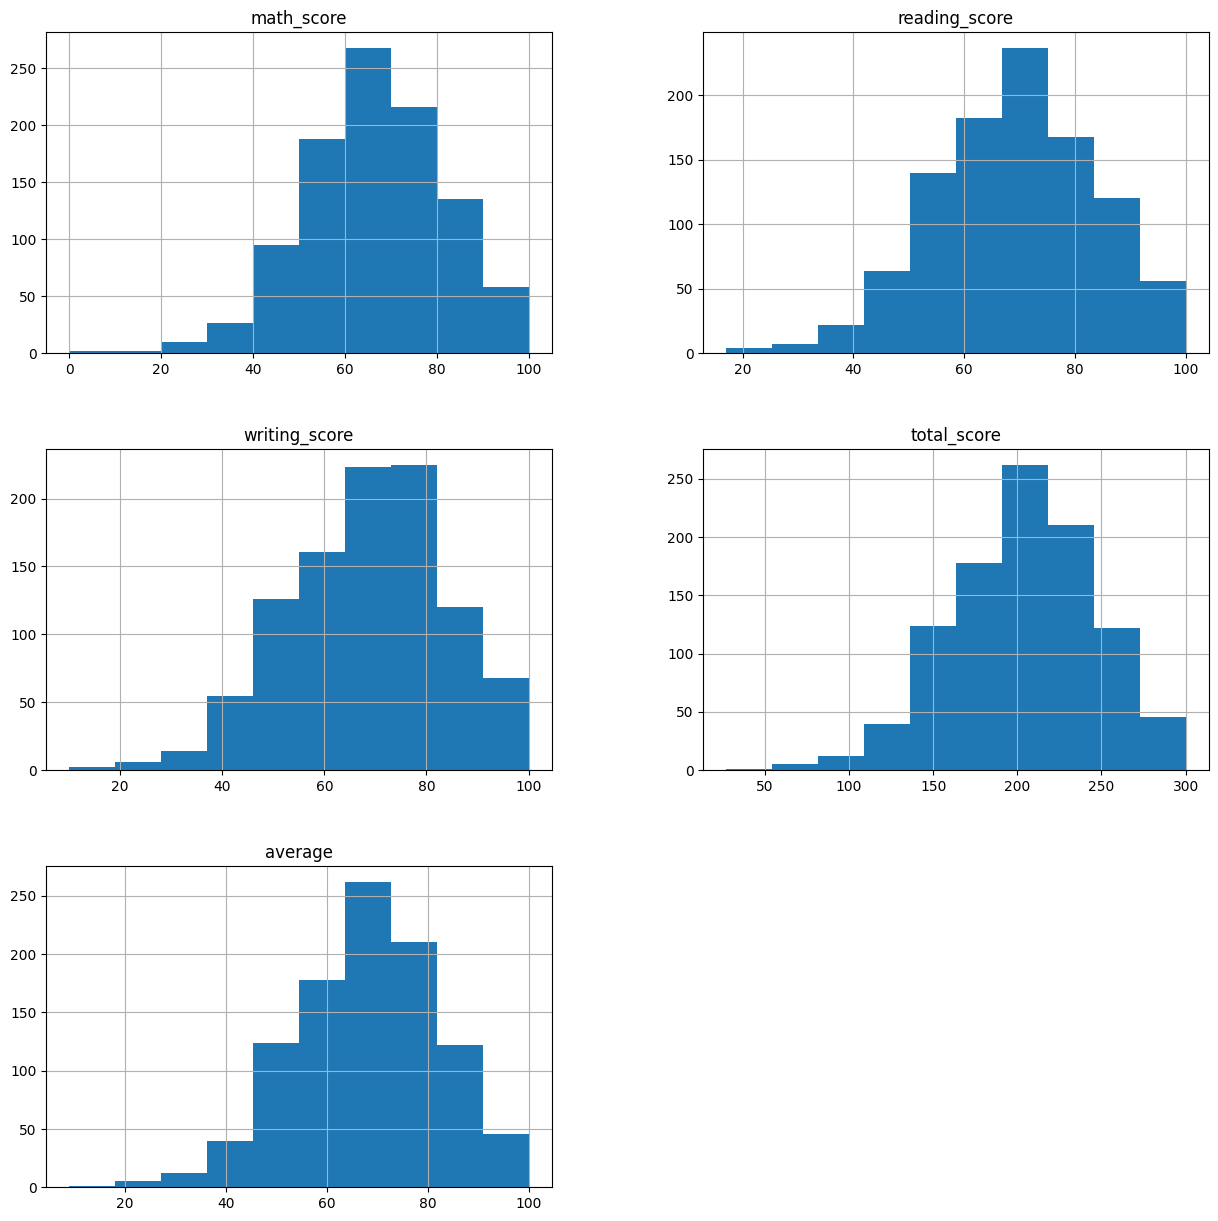

In [57]:
# Graph histogram
df.hist(figsize=(15,15))
plt.show()

In [58]:
# Check skewness
df[num].skew()

math_score      -0.278935
reading_score   -0.259105
writing_score   -0.289444
total_score     -0.299057
average         -0.299057
dtype: float64

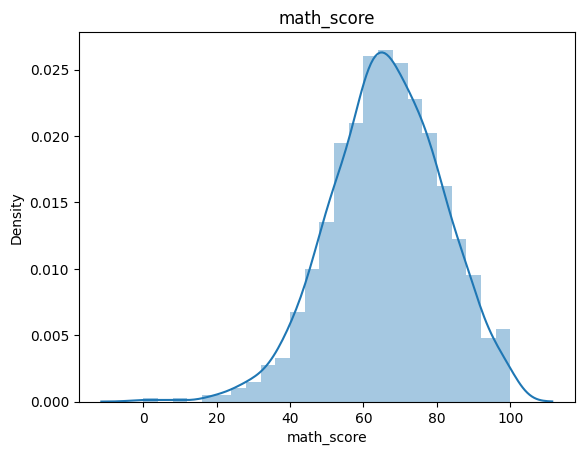

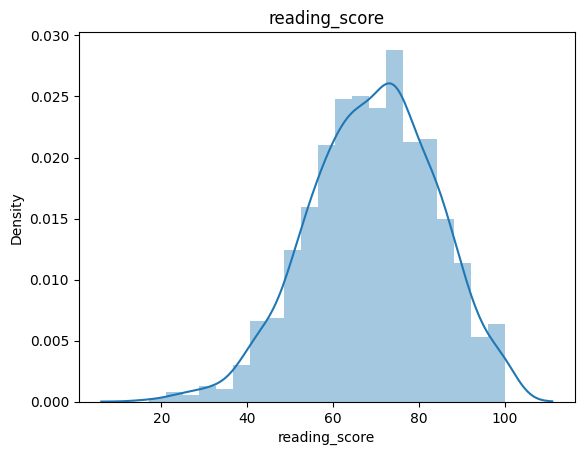

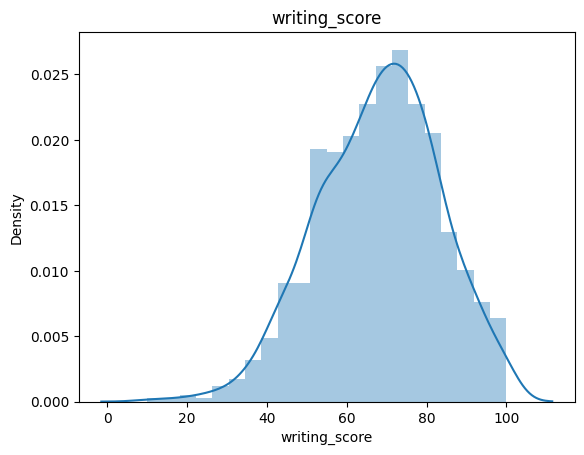

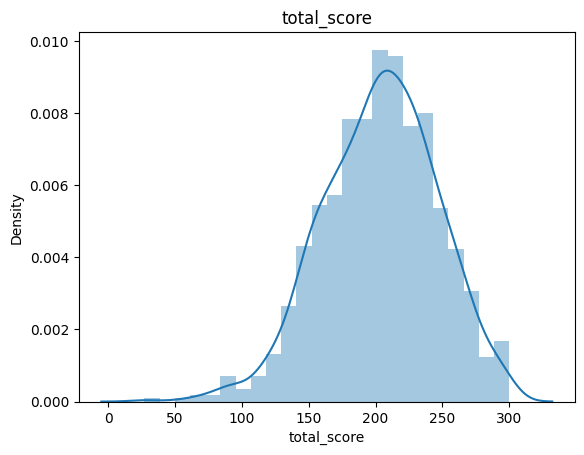

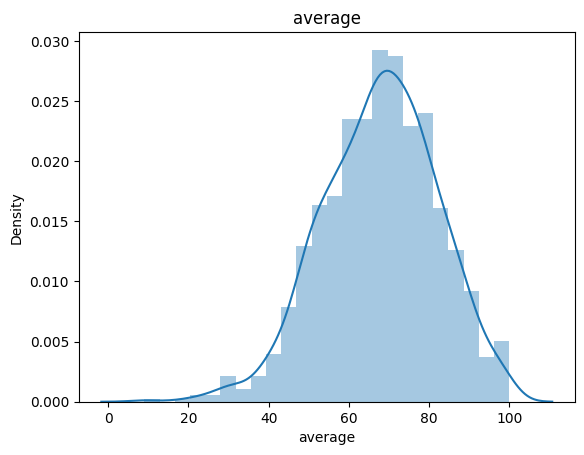

In [59]:
# Graph displot
for i in num:
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

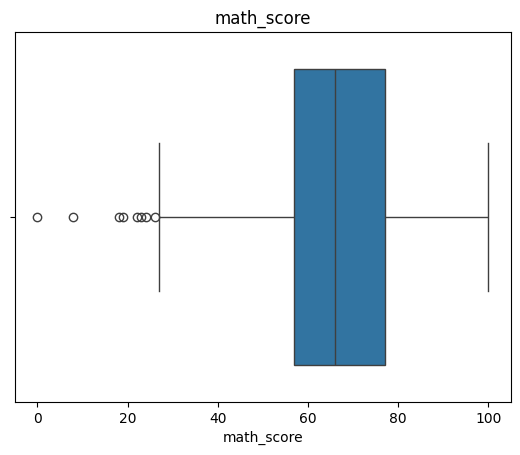

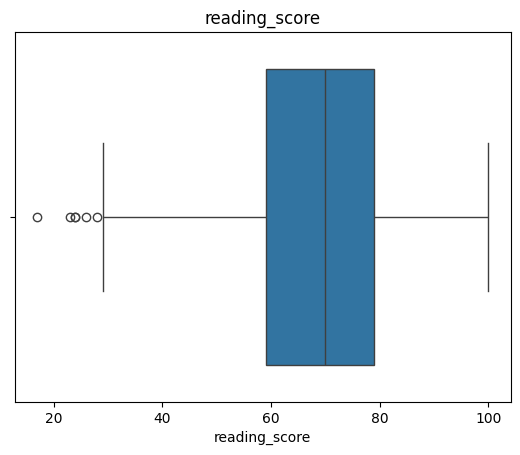

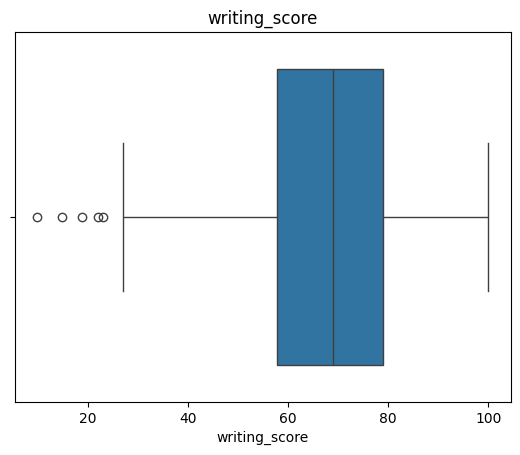

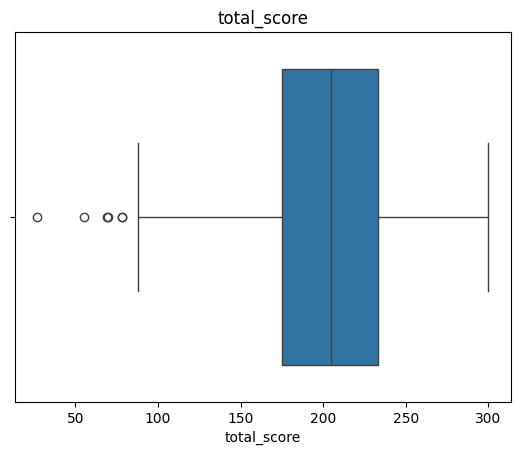

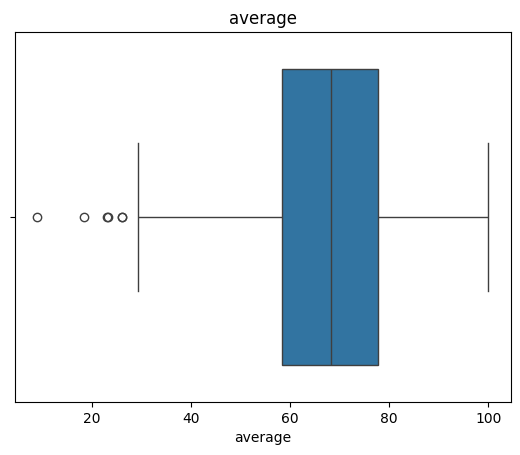

In [60]:
# Graph boxplot
for i in num:
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

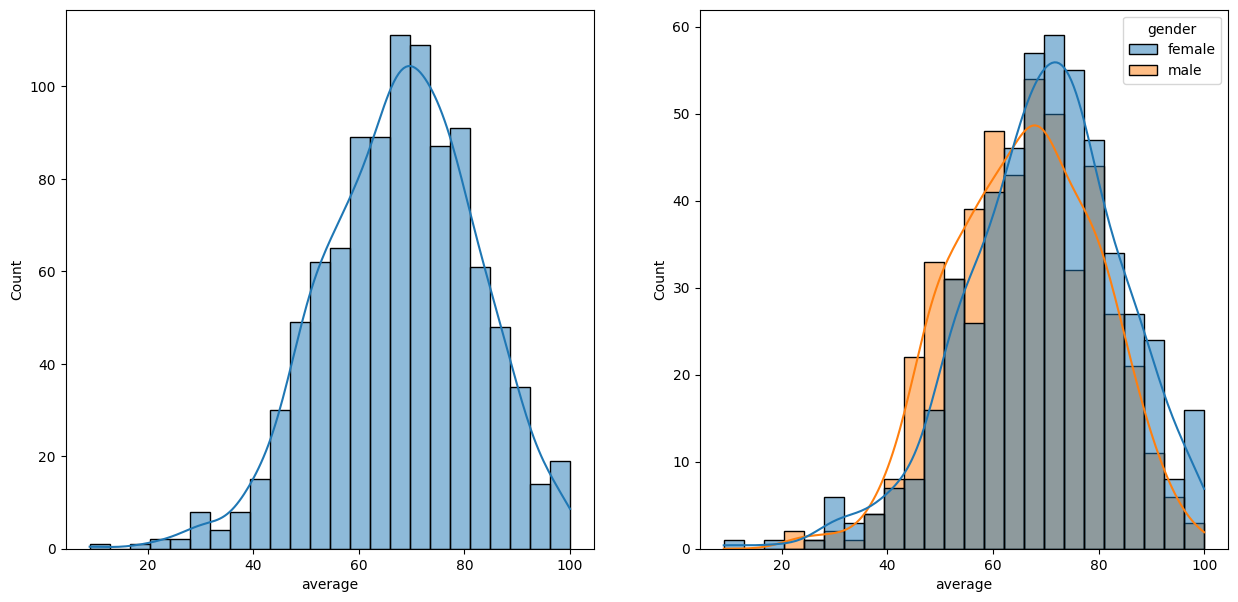

In [61]:
# Graph histogram and KDE of average feature
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data= df, x= 'average', kde= True)
plt.subplot(122)
sns.histplot(data= df, x= 'average', kde= True, hue= 'gender')
plt.show()

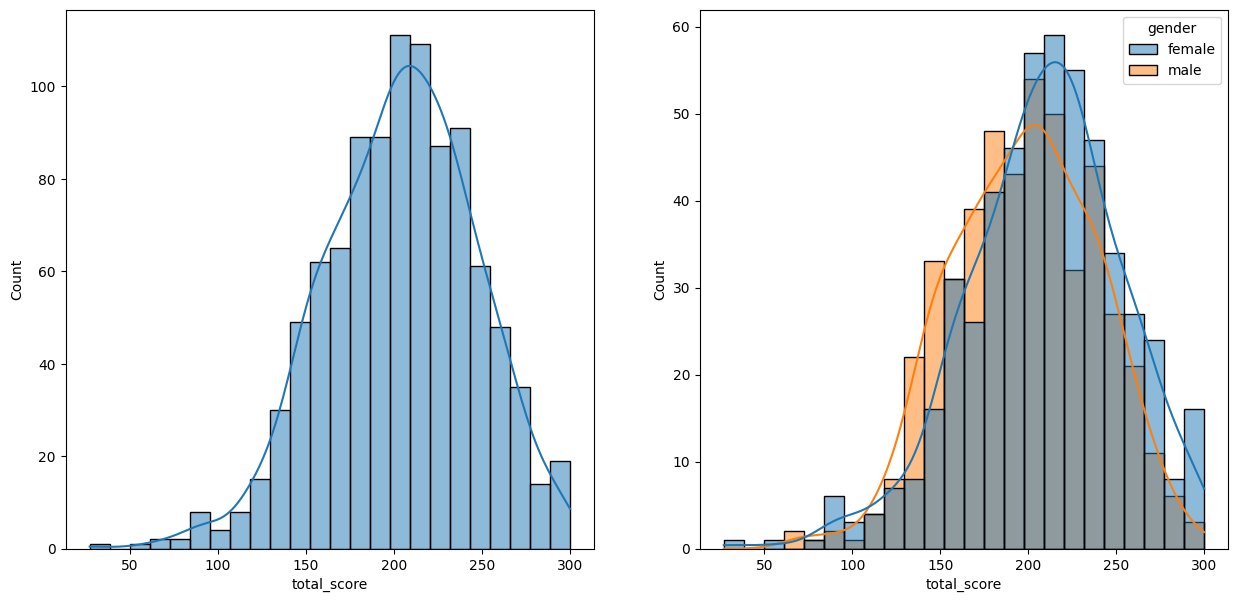

In [62]:
# Graph histogram and KDE of total_score feature
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data= df, x= 'total_score', kde= True)
plt.subplot(122)
sns.histplot(data= df, x= 'total_score', kde= True, hue= 'gender')
plt.show()

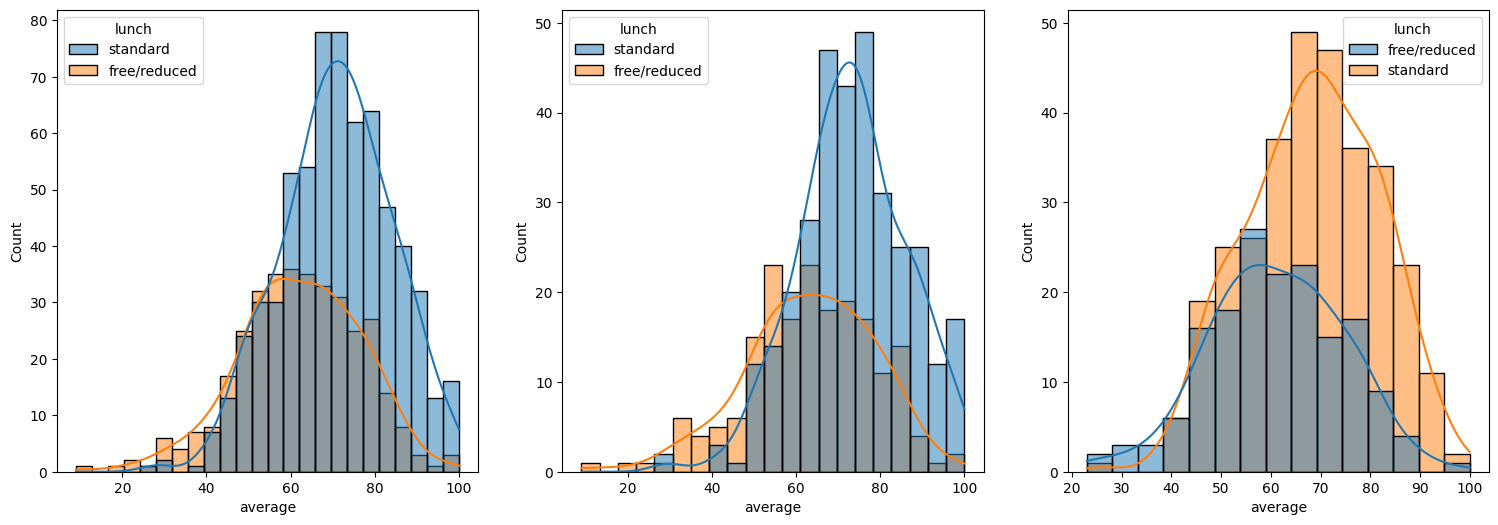

In [63]:
# Graph histogram and KDE of average feature
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data= df, x='average', kde= True, hue= 'lunch')
plt.subplot(142)
sns.histplot(data= df[df.gender== 'female'], x= 'average', kde= True, hue= 'lunch')
plt.subplot(143)
sns.histplot(data= df[df.gender== 'male'], x= 'average', kde= True, hue= 'lunch')
plt.show()

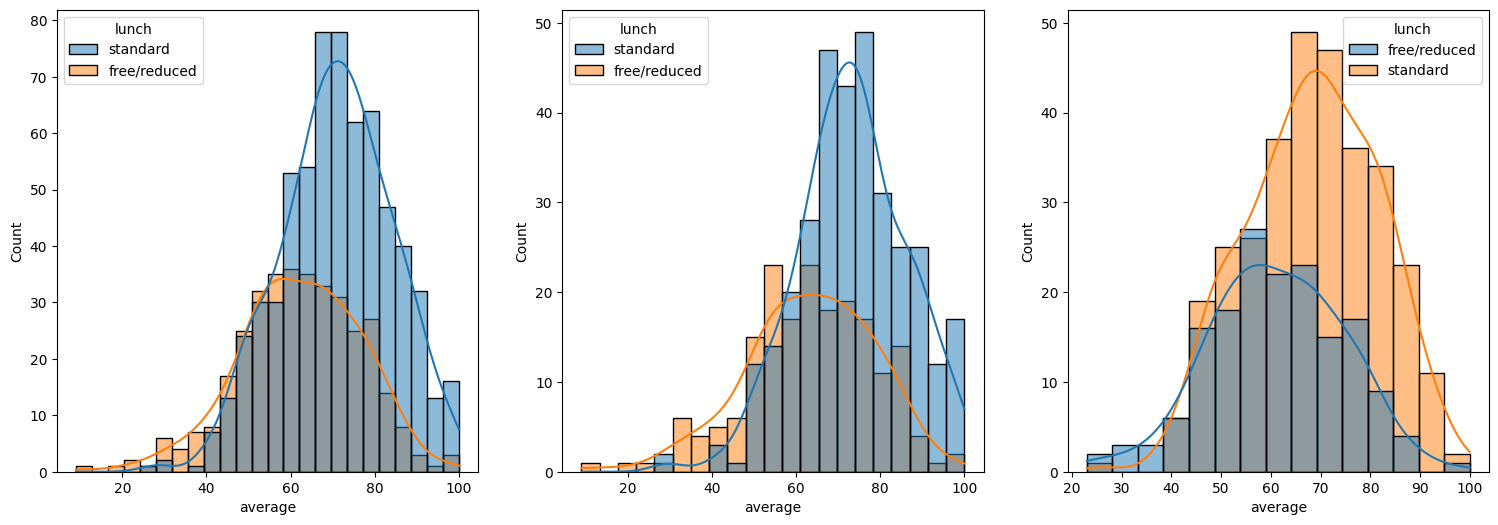

In [64]:
# Graph histogram and KDE of average and lunch features
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data= df, x='average', kde= True, hue= 'lunch')
plt.subplot(142)
sns.histplot(data= df[df.gender== 'female'], x= 'average', kde= True, hue= 'lunch')
plt.subplot(143)
sns.histplot(data= df[df.gender== 'male'], x= 'average', kde= True, hue= 'lunch')
plt.show()

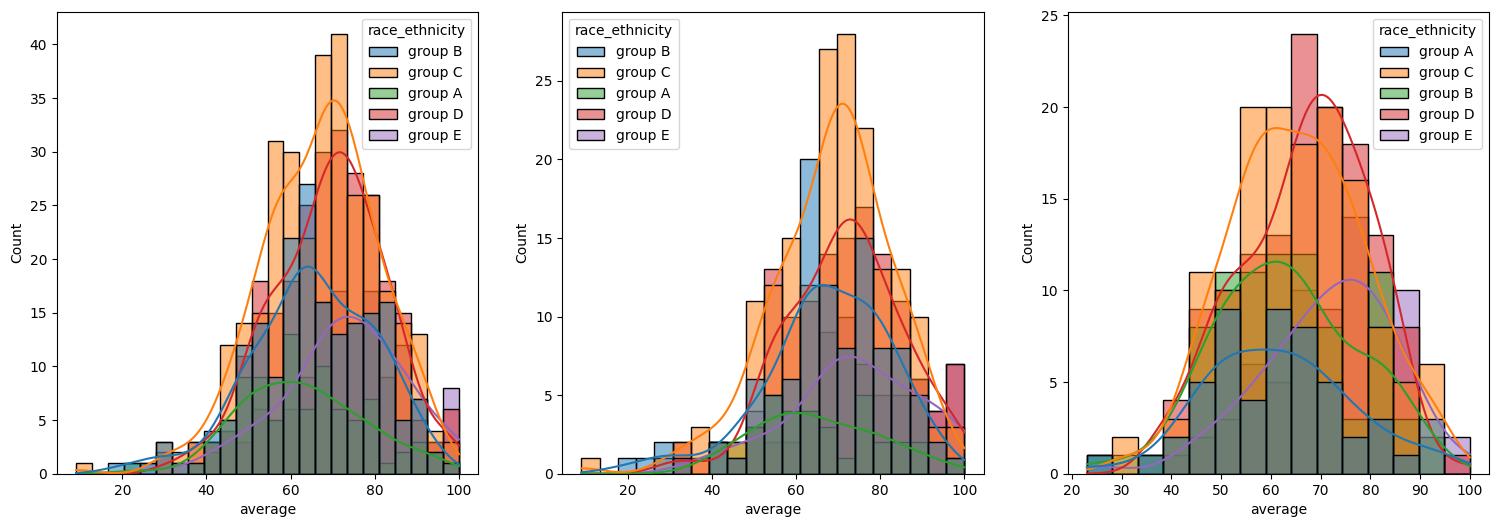

In [65]:
# Graph histogram and KDE of average and race_ethnicity feature
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data= df, x='average', kde= True, hue= 'race_ethnicity')
plt.subplot(142)
sns.histplot(data= df[df.gender== 'female'], x= 'average', kde= True, hue= 'race_ethnicity')
plt.subplot(143)
sns.histplot(data= df[df.gender== 'male'], x= 'average', kde= True, hue= 'race_ethnicity')
plt.show()

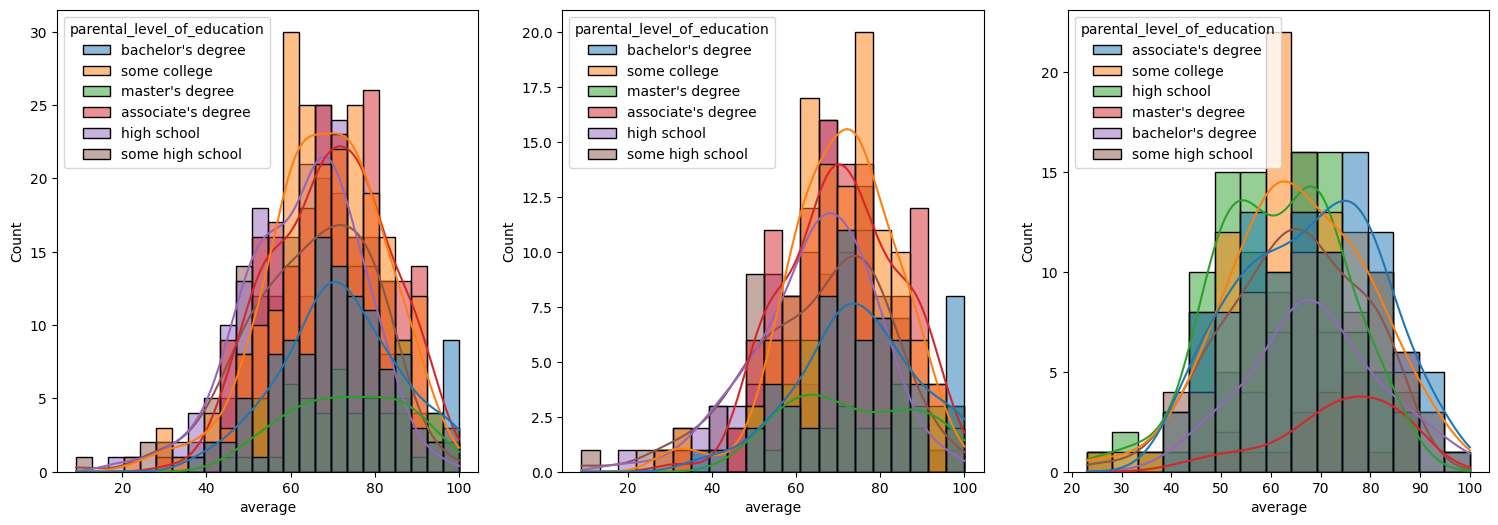

In [66]:
# Graph histogram and KDE of average and parental_level_of_education feature
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data= df, x='average', kde= True, hue= 'parental_level_of_education')
plt.subplot(142)
sns.histplot(data= df[df.gender== 'female'], x= 'average', kde= True, hue= 'parental_level_of_education')
plt.subplot(143)
sns.histplot(data= df[df.gender== 'male'], x= 'average', kde= True, hue= 'parental_level_of_education')
plt.show()

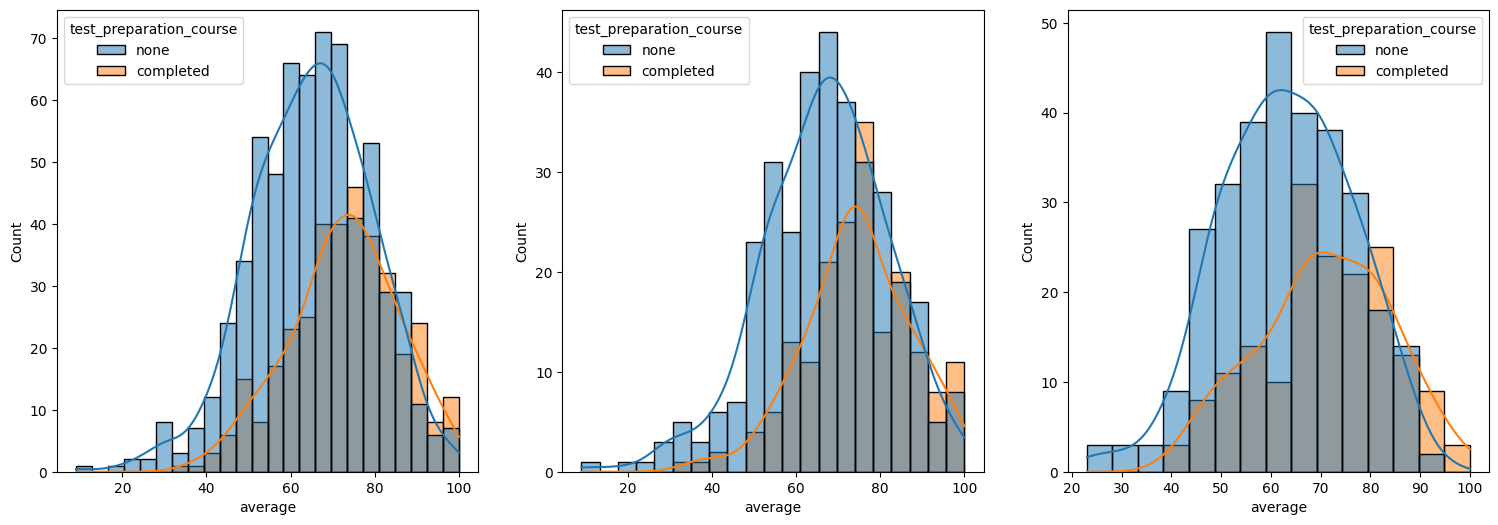

In [67]:
# Graph histogram and KDE of average and test_preparation_course feature
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data= df, x='average', kde= True, hue= 'test_preparation_course')
plt.subplot(142)
sns.histplot(data= df[df.gender== 'female'], x= 'average', kde= True, hue= 'test_preparation_course')
plt.subplot(143)
sns.histplot(data= df[df.gender== 'male'], x= 'average', kde= True, hue= 'test_preparation_course')
plt.show()

In [68]:
cat

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

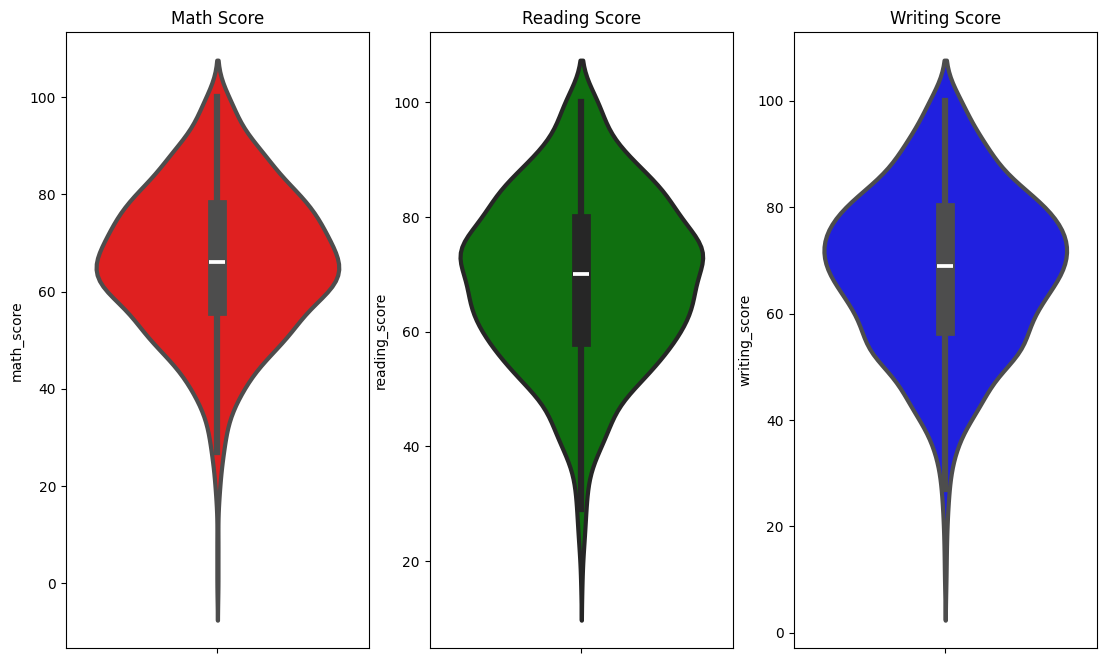

In [69]:
# Maximumum score of students in all three subjects
plt.figure(figsize= (18, 8))
plt.subplot(1, 4, 1)
plt.title('Math Score')
sns.violinplot(data= df, y='math_score', color= 'red', linewidth= 3)
plt.subplot(1, 4, 2)
plt.title('Reading Score')
sns.violinplot(data= df, y= 'reading_score', color= 'green', linewidth= 3)
plt.subplot(1, 4, 3)
plt.title('Writing Score')
sns.violinplot(data= df, y= 'writing_score', color= 'blue', linewidth= 3)
plt.show()

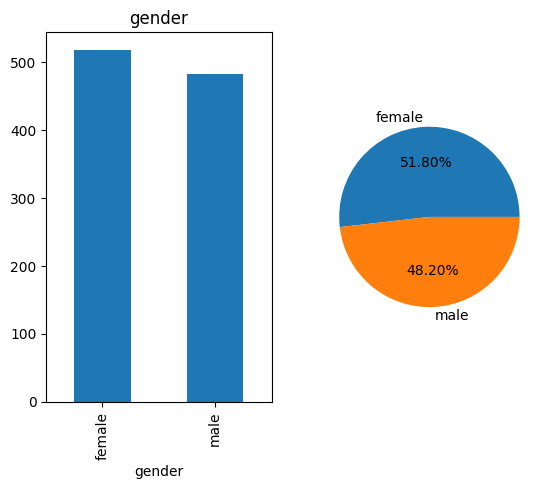

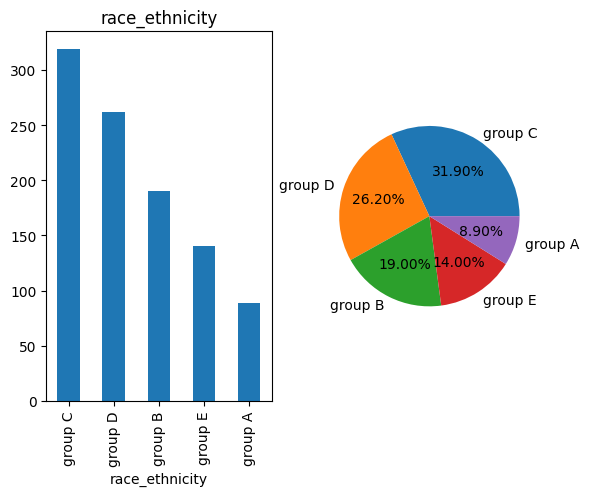

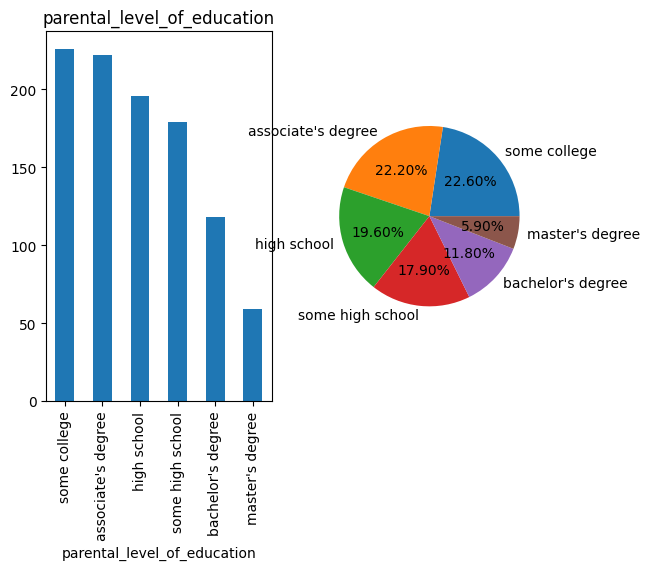

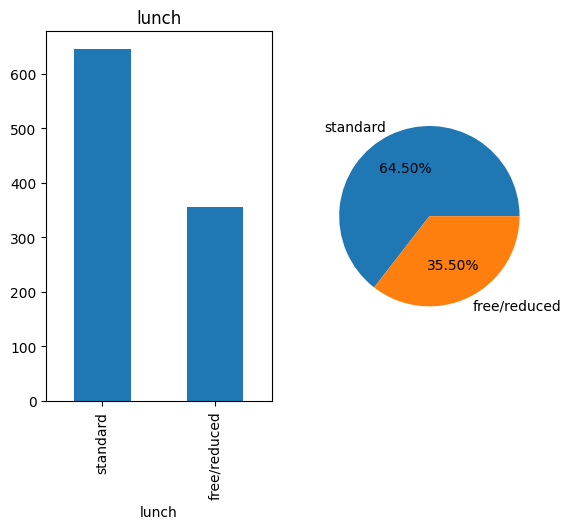

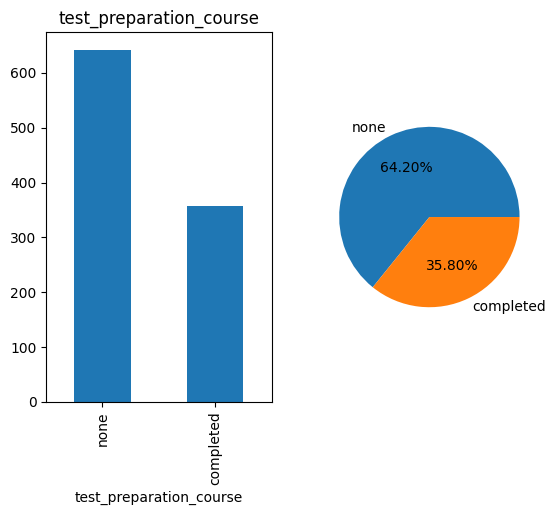

In [70]:
# Graph barplot of on cat cols
for i in cat:
    plt.subplot(121)
    df[i].value_counts().plot(kind= 'bar')
    plt.title(i)
    label = df[i].value_counts().index
    plt.subplot(122)
    plt.pie(df[i].value_counts(), labels= label, autopct='%.2f%%')
    plt.show()

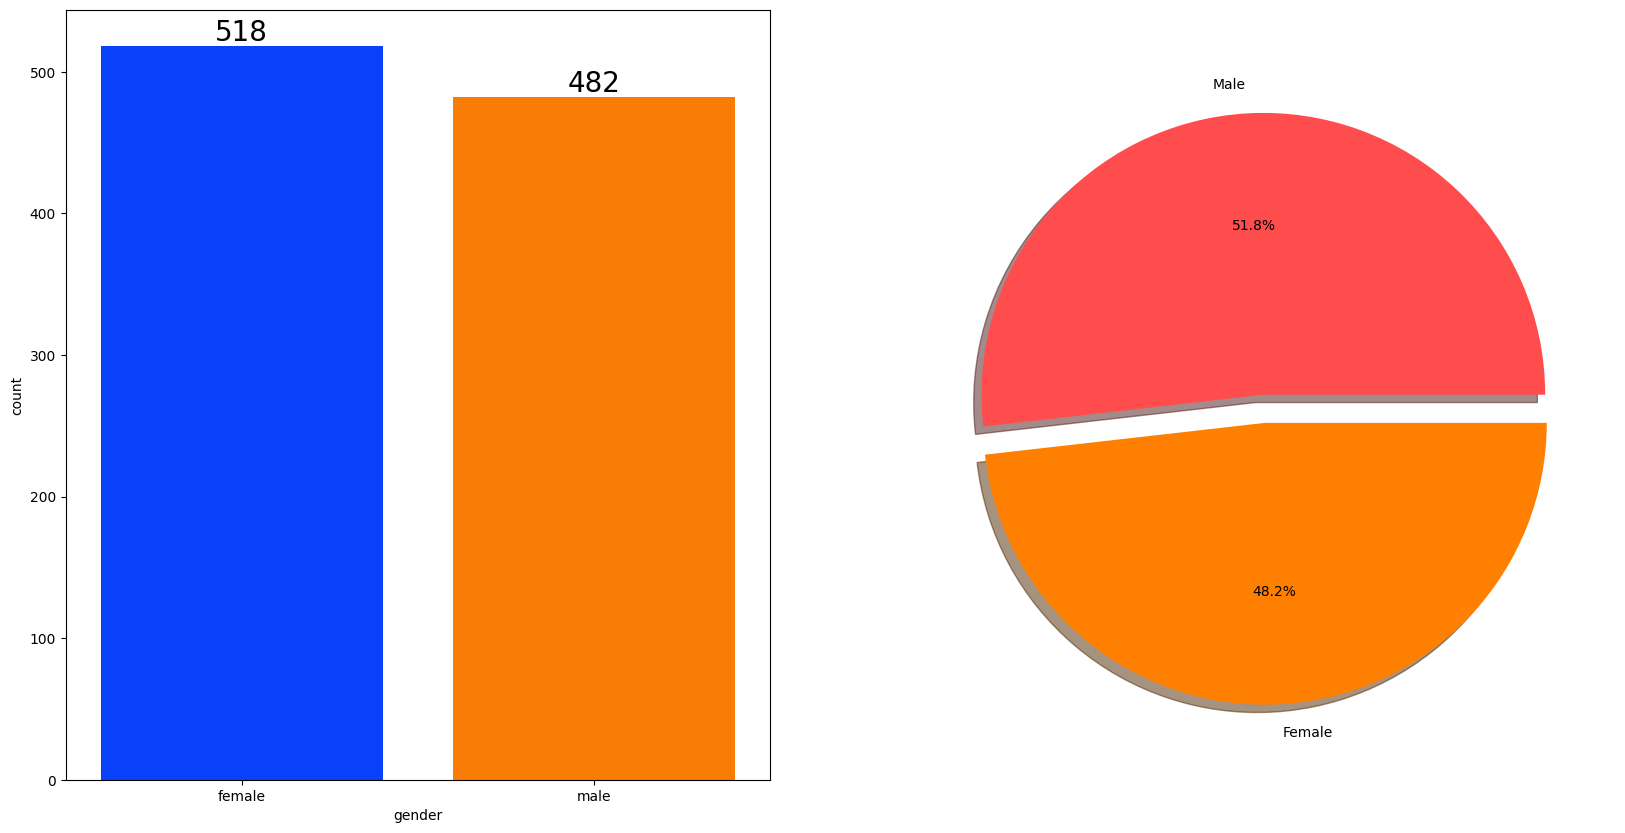

In [71]:
# UNIVARIATE ANALYSIS ( How is distribution of Gender ? )
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

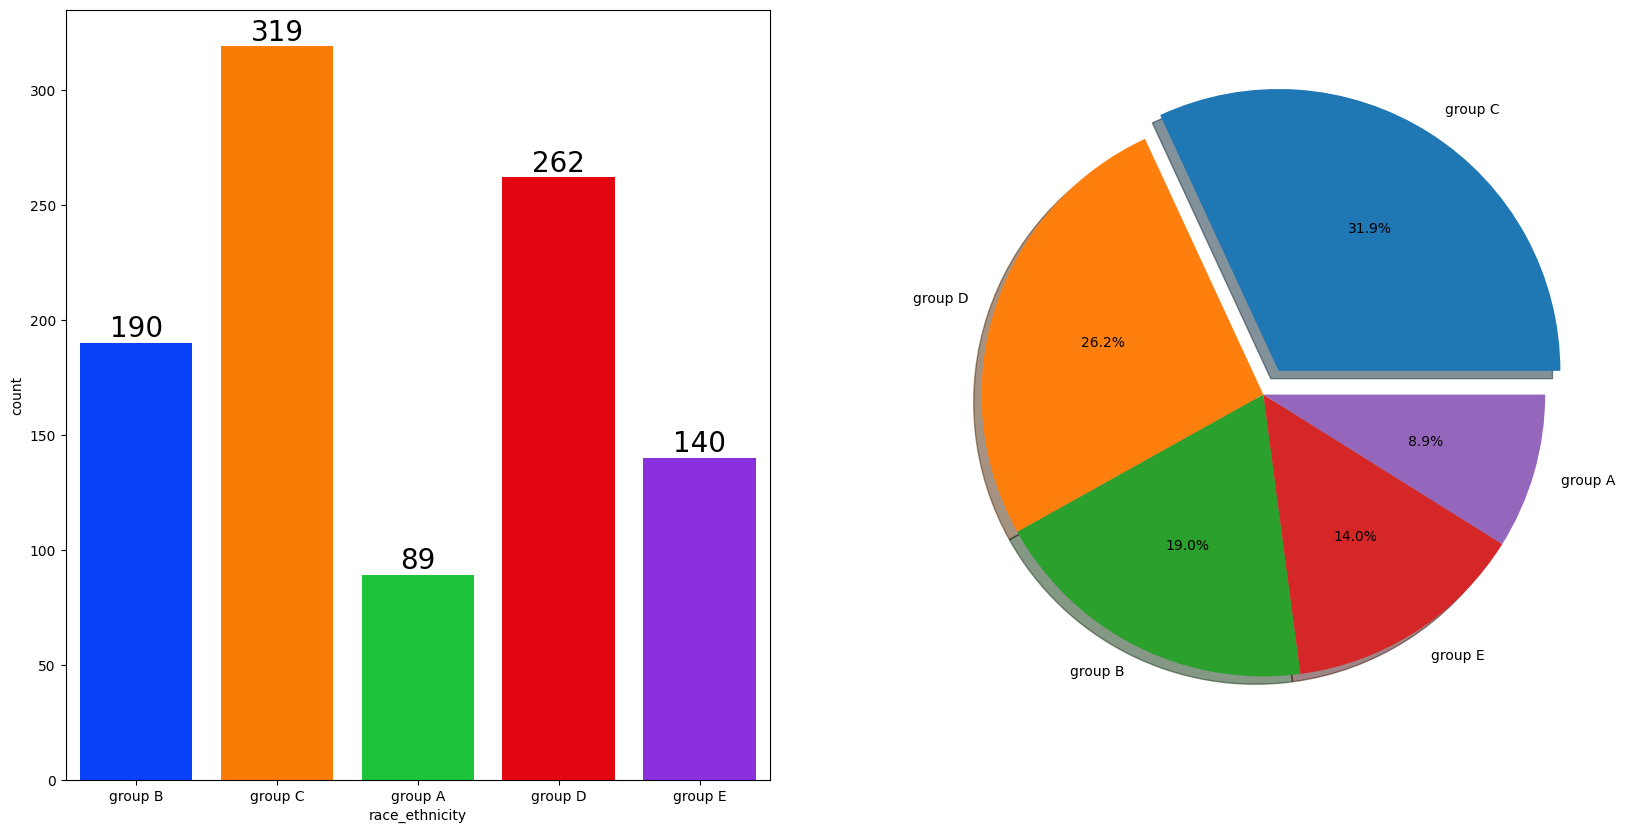

In [72]:
# UNIVARIATE ANALYSIS ( How is Group wise distribution ?)
f,ax=plt.subplots(1, 2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'], data=df, palette = 'bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

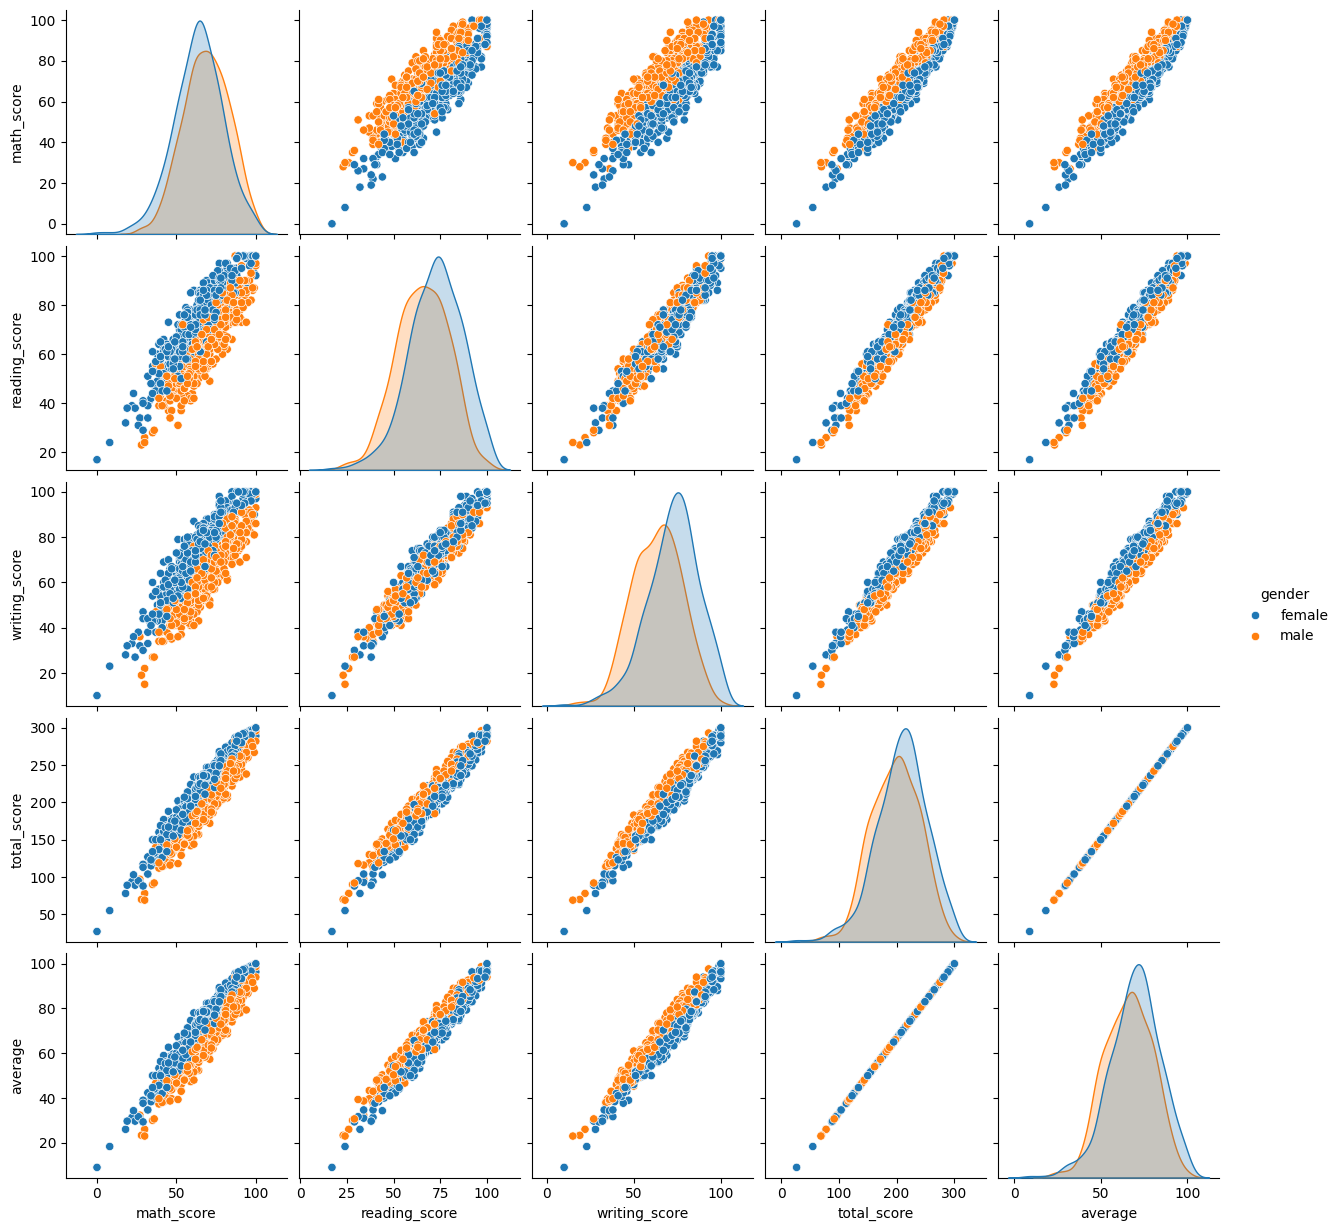

In [73]:
# MUTIVARIATE ANALYSIS USING PAIRPLOT
sns.pairplot(df,hue = 'gender')
plt.show()